In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import time
import joblib
import pickle
import platform
import os
os.chdir('/sfs/qumulo/qhome/bdr6qz/Documents/MSDS/DS6050')
from modeling import train_models
from helper_functions import get_hardware_details

In [2]:
df = pd.read_csv('df_clean.csv')
labels = df.pop("mvp_share")
df_selected = pd.read_csv('df_selected.csv')
feature_names = list(df_selected.columns)

/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'log2', 10, 5] before, using random point [4, None, 8, 19]
  warnings.warn(
/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 'log2', 10, 6] before, using random point [8, 'sqrt', 8, 9]
  warnings.warn(
/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 'exponential', 239] before, using random point [0.24535261541180178, 'linear', 188]
  warnings.warn(
/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 'linear', 226] before, using random point [0.32692231552168993, 'exponential', 324]
  warnings.warn(


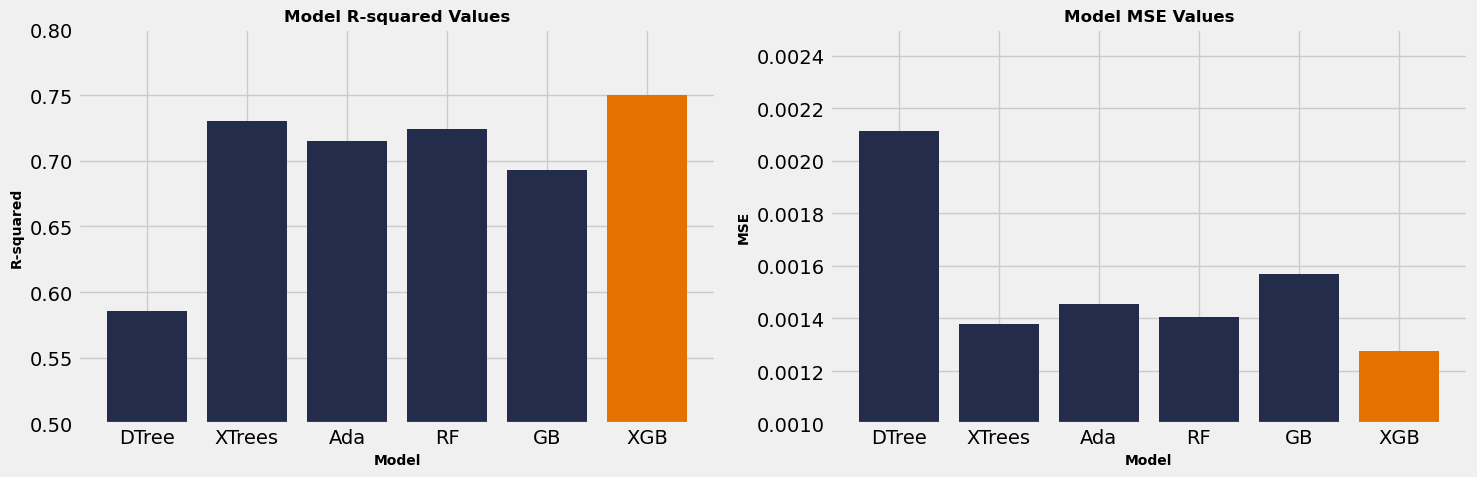

           DTree                         XTrees                         Ada             
│ Feature   │   Importance │  │ Feature   │   Importance │  │ Feature   │   Importance │
╞═══════════╪══════════════╡  ╞═══════════╪══════════════╡  ╞═══════════╪══════════════╡
│ WS        │      0.66245 │  │ WS        │      0.24676 │  │ PER       │      0.34022 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ MP        │      0.13011 │  │ VORP      │      0.19704 │  │ WS        │      0.26529 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ PER       │      0.09048 │  │ PER       │      0.13906 │  │ VORP      │      0.14638 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ VORP      │      0.0437  │  │ WS/48     │      0.11946 │  │ Rk_Year   │      0.12836 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ Rk_Year   │      0.

In [3]:
start_time = time.time()

trained_models, results, best_model_name, best_model = train_models(df_selected,
                                                                    df,
                                                                    labels,
                                                                    feature_names,
                                                                    label_col_name="mvp_share")

end_time = time.time()
execution_time = end_time - start_time
print(f"Model building execution time: {round(execution_time/60, 2)} minutes")

In [4]:
results

{'DTree': {'MSE': 0.002113117286102088, 'R-squared': 0.5859226350432487},
 'XTrees': {'MSE': 0.0013784921371625771, 'R-squared': 0.7298766161613313},
 'Ada': {'MSE': 0.0014539395292427373, 'R-squared': 0.7150922700623792},
 'RF': {'MSE': 0.001406333716823925, 'R-squared': 0.7244209000881026},
 'GB': {'MSE': 0.0015685861551569566, 'R-squared': 0.6926266108810512},
 'XGB': {'MSE': 0.0012774443668266376, 'R-squared': 0.7496775021559949}}